# What is The Best Neighborhood In Pittsburgh?
by Casey Dinan, Kyle Bello, and Nate Quigley

Food is what brings all people together. It is the driving force of energy, happiness, and life. Without food, we are nothing.

Our project today deals with exactly that: food. Specifically, food in Allegheny County.

Coming into this project, we did had no idea what our metric was going to be. After being inspired by a dataset about Fish Fry Locations in Allegheny County, our group went down the rabit hole of food-adjacent datasets to found on the WPRDC. After finding some compelling data and interesting datasets, we figured out what best meant to us. Our metric for the best town is Pittsburgh is:

#### Food and Food Availibility

What may seem to be a rather mundane metric, food and food availibilty in Allegheny county is more interesting than it seems. Our metric involves measuring how availible food is in every town, using data from grocery stores to fast food. We came up with this metric after finding multiple datasets dealing with food availiblty by zip code/county.

### Datsets:
1. [Supermarkets/Convenience Stores in Allegeny County](https://data.wprdc.org/dataset/allegheny-county-fast-food)
2. [Fast Food Establishments in Allegheny County](https://data.wprdc.org/dataset/allegheny-county-fast-food)
3. [Farmers Markets In Allegheny County]()

These datasets allow us to look at each town in Pittsburgh, figure out how much food is availible by location, and decide the quality of said food by referencing it with obesity rates of each town. With that, lets take a look at our findings!

# [1. Allegeny County Markets](./SupermarketsAnalysis.ipynb)
By: Casey Dinan

## Results
From this dataset we can conclude that, by our metric, the towns that have the best are:

1. Shadyside
2. Squirrel Hill
3. East Liberty
4. Point Breeze

Each of these either contains the greatest number of supermarkets, or is in close proximity to markets in neighboring neighborhoods. Due to the wide availability in these neighborhoods, they came out on top in the supermarket metric. 

## Data Conclusion
This data set provided a vast amount of information on all food facilities in Allegheny County. This provided the ability to extract any relevant data from the set, in this case information regarding supermarkets. Not only did the data provide an accurate reflection of Pittsburgh, but the extensive details it provided allowed for insightful conclusions to be drawn. 

# [2. Allegheny County Fast Food Establishments](./fastFoodData.ipynb)
By: Kyle Bello

## *Breif Intoduction*
You may not know this, but humans need food to survive! As young adults, we spend almost [67 minutes](https://www.usda.gov/media/blog/2011/11/22/how-much-time-do-americans-spend-eating) per day eating food! 

While we would like the best, most delicious food much of the time, sometimes we just need food... *fast*.

To find the best town in Pittsburgh, I examined the data from [this survey](https://data.wprdc.org/dataset/allegheny-county-fast-food) of fast food restaurants by zip code conducted by Allegheny County.

The survey took data from all zip codes in Allegheny County by name, including smaller fast food places as well as chains.

## Preparing The Data
Lets start with the basic imports needed for data analysis:

In [3]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt

My next step is to read in the data from the study, titled as ``fast_food`` in the code.

In [4]:
fast_food = pd.read_csv("fastfoodalleghenycountyupdatexy2.csv", sep=",") #reading in csv
fast_food.head()

,Name,Legal Name,Start Date,Street Number,Street Name,ZIP Code,Lat,Lon,Category
0,Adrian's Pizza,NaN,11/7/2014,605,Thompson Run Rd,15237,40.539465,-79.990764,Take Out
1,Adrian's Pizza Express,Rock Enterprises Inc,4/22/2004,7824,Perry Hwy,15237,40.551219,-80.037362,Take Out
2,Allegheny Sandwich Shop,NaN,2/24/1997,414,Grant St,15219,40.438110,-79.996860,NO Dollar Menu
3,Allegheny Sandwich Shoppe #3,Allegheny Sandwich Shoppe Inc,11/9/2001,440,Ross St,15219,40.438514,-79.995330,NO Dollar Menu
4,Amili's Pizzeria,NaN,2/26/1999,1021,Brownsville Rd,15210,40.406082,-79.991863,Take Out


In [5]:
fast_food['ZIP Code'] = fast_food['ZIP Code'].astype(str) #changing data type for merge with map
ff_by_zip = fast_food.groupby('ZIP Code')['Name'].count() #grouping total count of fast food places by zip

You can also see on the second line of that code, I had to use ``.astype(str)`` on the data in the ZIP Code column of ``fast_food``.

This is because on the map file (We will see this soon), the zip code data was stored differently. This type casting allows me to now use both dataset's zip codes togther.

In [6]:
county_map = gp.read_file("ZipCodeShapeFile/Allegheny_County_Zip_Code_Boundaries.shp") #reading in map file
county_map = county_map.merge(fast_food.groupby('ZIP Code')['Name'].count().reset_index(), left_on='ZIP', right_on='ZIP Code') #merging our map zip code data w/ fast food zip code data

After reading in the map file, that second line of code is... rough.

I am merging the zip code data of ``fast_food`` and ``county_map`` using the ``.merge`` function of pandas.

``left_on = 'ZIP'`` gets the zip code data from ``county_map``

``right_on = 'ZIP Code'`` gets the zip code data from ``fast_food``

Lets make our map!

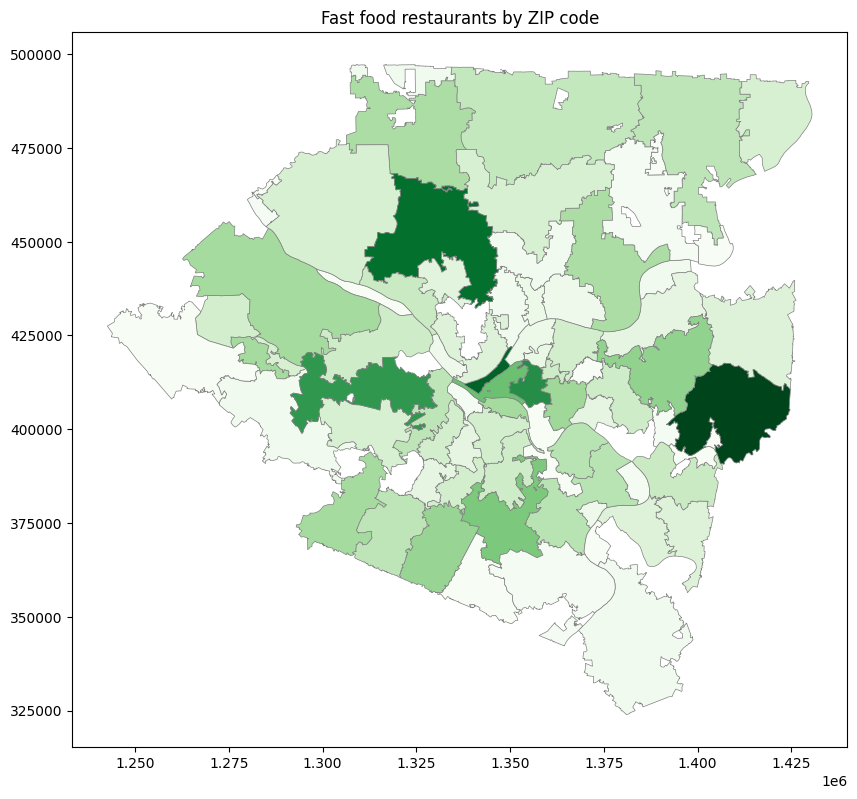

In [7]:
fig, ax = plt.subplots(figsize=(10,10)) #creating figure/plot
county_map.plot(column='Name', cmap='Greens', linewidth=0.5, ax=ax, edgecolor='0.5') #plotting map
ax.axis('on')
ax.set_title('Fast food restaurants by ZIP code') #setting title
plt.show()

Currently, if you're like me and don't really know Pittsburgh, I don't know what's going on!

Looking at our map plot, there are a few zip codes with *many* fast food establishments.

As well, there are many zip codes that don't have very many at all!

Let's take a look at those.

# Data Analyis

First, lets look at the bottom zip codes to see which towns have the fewest establishments

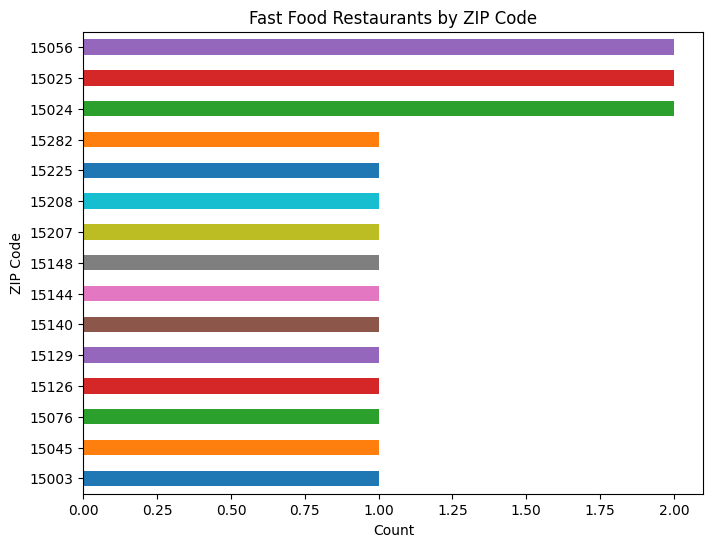

In [8]:
bottom_zips = ff_by_zip.nsmallest(15) #getting the bottom smallest zip codes
ax = bottom_zips.plot(kind='barh', color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14'], figsize=(8,6)) #making bar plot
ax.set_xlabel('Count') #setting axis
ax.set_ylabel('ZIP Code')
plt.title('Fast Food Restaurants by ZIP Code')
plt.show()

As we can see, there is a 12 zip code tie for least amount of fast food establishments!

However, this data isn't very intersting, lets move on.

Next, lets look at which zip codes have the most fast food restaurants!

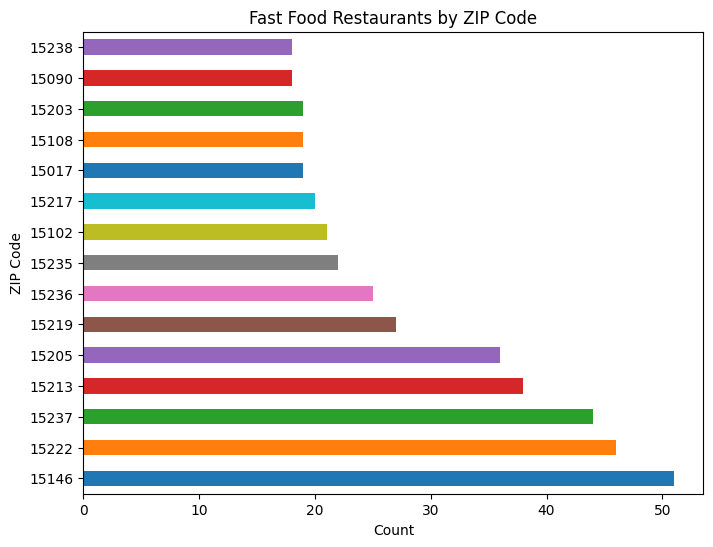

In [9]:
bottom_zips = ff_by_zip.nlargest(15) #getting the bottom smallest zip codes
ax = bottom_zips.plot(kind='barh', color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14'], figsize=(8,6)) #making bar plot
ax.set_xlabel('Count') #setting axis
ax.set_ylabel('ZIP Code')
plt.title('Fast Food Restaurants by ZIP Code')
plt.show()

Much more intersting! Let's take a look at our top 10 zip codes:

## Results

#### Zip Codes With the Most Fast Food Establishments
    10. 15217 - Pittsburgh (Squirrel Hill)
    9. 15102 - Bethel Park
    8. 15235 - Penn Hills
    7. 15236 - West Mifflin
    6. 15219 - Pittsburgh (Hill District)
    5. 15205 - Pittsburgh (Crafton)
    4. 15213 - Oakland
    3. 15237 - McKnight
    2. 15222 - Strip District
    1. 15146 - Monroeville

From this data, we can see that our top few towns are mostly out of Pittsburgh. Narrowing our data, here is our top 5 towns/neighborhoods:

1. Strip District (Downtown)
2. Oakland (North Oakland, South Oakland, Shadyside)
3. Hill Disrict (Middle Hill, Upper Hill, Crawford-Roberts)
4. Pittsburgh (Squirrel Hill, Greenfield)

Look at the previous dataset, Squirrel Hill and Shadyside again make an appearance. Currently, Shadyside offers the best proximity to supermakrets and is the closest to more fast food.

## Data Conclusion
This dataset offered a lot of great information about fast food establishments in Allegheny County. While it was not the most focused to Pittsburgh, it still porvided plenty of useful information regarding fast food/restaurant availibilty in and around Pittsburgh. As well, it was fairly simple to use with a shape file of the city, as both contained zip code information. Overall, this dataset was a great addition to our project.

# [3. Allegheny Farmers Markets](./FarmersMarkerts.ipynb)
By: Nate Quigley

## Results

1. Point Breeze North
2. Point Breeze
3. Homewood West
4. Homewood South

All four of these locations are in the same vicinity of each other, and compared to the first data set above, Point Breeze seems to appear a second time, while for this specific data set, Point Breeze North claims the most Farmer's Market options.

## Data Conclusion

The dataset on farmers markets in Pittsburgh provided me with valuable information on the distribution of fresh food across different neighborhoods. Using this dataset, I was able to identify the neighborhoods with the highest concentration of farmers markets, which helped me to determine the neighborhoods with the best food availability, hence higher food quality.

## Overarching Metric

Our overall metric is food quality per neighboorhood, which is a composite ranking of the three subrankings. To properly quantify this, the intersection of all our metrics can be taken. This will allow neighboorhoods with all factors to be prioritized, as every metric is important to the overall food quality in a given area. In the event that neighboorhoods have the same amount of intersections, the rankings within the lists they occured on will be taken into account as a tie breaker.

## Results

1. Shadyside
2. Point Breeze
3. Squirrel Hill

## Data Conclusion

The overall composite rankings yeild interesting results. While it would be assumed that the more developed downtown areas of Pittsburgh would provide the greatest diversity of food options, it is actually the more suburban areas such as Shadyside and Squirrel Hill. Downtown had a plethora of fast food options, but markets in general appear to be consintrated outside the urban centers. This is a good indication of why Pittsburgh's suberbs are so diserable for both young adults and families alike, as they provide far superior food options to the rest of the Pittsburgh area.